# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [3]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import matplotlib
import numpy as np

%matplotlib inline

In [4]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [6]:
# Calculate the mean number of dwelling types units per year (hint: use groupby)
housing_units = to_data.groupby(['year']).sum()
housing_units.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [7]:
# Save the dataframe as a csv file
housing_units.to_csv('housing_type_avg_by_year.csv')


In [8]:
# Helper create_bar_chart function
#def create_bar_chart(data, title, xlabel, ylabel, color)

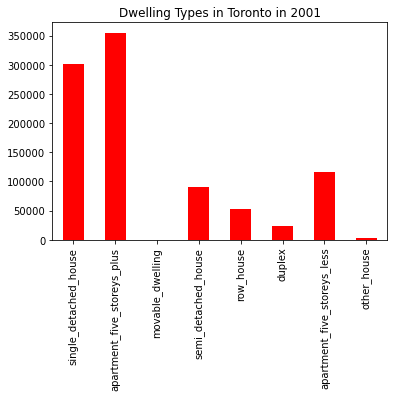

In [9]:
#Create a bar chart per year to show the number of dwelling types
housing_units.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'],
                   axis=1,
                   inplace=True)
                         
dwellings_2001 = housing_units.iloc[0]

dwellings_2001.plot.bar(title = 'Dwelling Types in Toronto in 2001',
                        color = 'r')

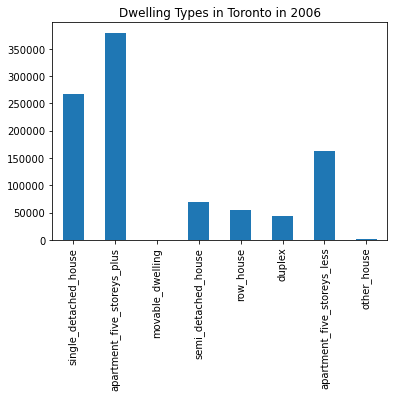

In [10]:
#Bar chart for 2006
dwellings_2006 = housing_units.iloc[1]
dwellings_2006.plot.bar(title = 'Dwelling Types in Toronto in 2006')

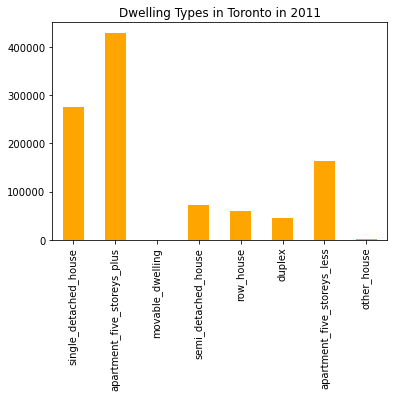

In [11]:
#Bar chart for 2011
dwellings_2011 = housing_units.iloc[2]
dwellings_2011.plot.bar(title = 'Dwelling Types in Toronto in 2011', color = 'orange')

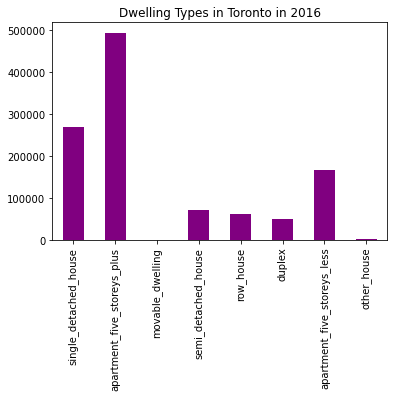

In [12]:
#Bar chart for 2016
dwellings_2016 = housing_units.iloc[3]
dwellings_2016.plot.bar(title = 'Dwelling Types in Toronto in 2016', color = 'purple')

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [13]:
# Calculate the average monthly shelter costs for owned and rented dwellings
housing_units = to_data.groupby(['year']).sum()
housing_units.head()
shelter_cost_owned = housing_units.iloc[:,-2]
shelter_cost_rented = housing_units.iloc[:,-1]


In [14]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """

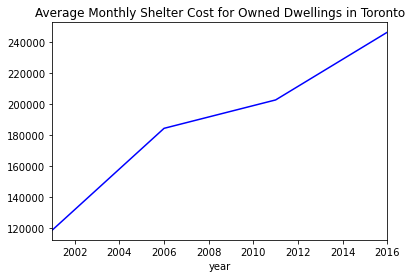

In [15]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year
# Line chart for owned dwellings
shelter_cost_owned.plot.line(title = 'Average Monthly Shelter Cost for Owned Dwellings in Toronto',
                             color = 'blue')

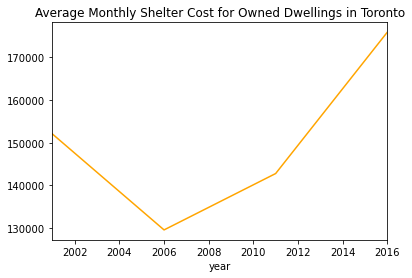

In [16]:
# Line chart for rented dwellings
shelter_cost_rented.plot.line(title = 'Average Monthly Shelter Cost for Owned Dwellings in Toronto',
                              color = 'orange')

## Average House Value per Year

In [17]:
# Calculate the average house value per
housing_units = to_data.groupby(['year']).mean()
avg_house_value = housing_units.iloc[:,-3]
avg_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

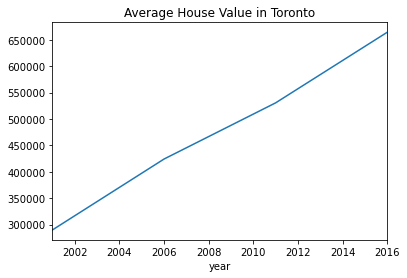

In [18]:
# Plot the average house value per year as a line chart
avg_house_value.plot.line(title = 'Average House Value in Toronto')

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [19]:
# Create a new DataFrame with the mean house values by neighbourhood per year
to_new_data = to_data.groupby([to_data.index, "neighbourhood"]).mean()
to_house_value = to_new_data["average_house_value"]
to_house_value = pd.DataFrame(to_house_value).reset_index()
to_house_value.head()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


In [20]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

to_house_value.hvplot(
    x='year',
    xlabel = 'Year',
    y='average_house_value',
    ylabel = 'Avg. House Value',
    groupby = 'neighbourhood',
    kind = 'line')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean number of dwelling types for each year and neighbourhood.

In [21]:
# Fetch the data of all dwelling types per year
to_data.head()
dwelling_type = to_data.groupby([to_data.index, "neighbourhood"]).mean()

dwelling_type.hvplot(
    x='year',
    xlabel = 'Year',
    y=['single_detached_house', 
       'apartment_five_storeys_plus', 
       'movable_dwelling', 
       'semi_detached_house', 
       'row_house', 
       'duplex', 
       'apartment_five_storeys_less', 
       'other_house'
      ],
    ylabel = 'Avg. House Value',
    groupby = 'neighbourhood',
    kind = 'bar',
    stacked = False,
    rot = 90,
    height = 500)


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

In [22]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

dwelling_type.hvplot(
    x='year',
    xlabel = 'Year',
    y='average_house_value',
    ylabel = 'Avg. House Value',
    groupby = 'neighbourhood',
    kind = 'bar',
    stacked = False)

:DynamicMap   [neighbourhood]
   :Bars   [year]   (average_house_value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [23]:
# Getting the data from the top 10 expensive neighbourhoods
top_10_most_expensive = to_data.sort_values(by='average_house_value', ascending=False).head(10)
top_10_most_expensive


,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2016,Bridle Path-Sunnybrook-York Mills,2275,590,0,40,230,30,80,0,2124653,2903,2942
2011,Bridle Path-Sunnybrook-York Mills,2285,480,0,45,100,30,50,0,1697067,2387,2388
2016,Forest Hill South,1685,2025,0,65,40,70,1050,0,1664653,2383,1486
2016,Lawrence Park South,3420,925,0,110,35,230,1015,5,1522732,2644,1515
2016,Rosedale-Moore Park,2450,4990,0,485,260,345,1505,5,1522193,2498,1809
2016,St.Andrew-Windfields,3245,1745,0,175,540,120,595,5,1390616,2516,1565
2016,Casa Loma,875,2680,0,265,200,155,1225,0,1365503,2434,1841
2006,Bridle Path-Sunnybrook-York Mills,2205,145,0,35,15,30,10,0,1356757,2170,2167
2011,Forest Hill South,1730,1825,0,65,45,75,1035,0,1329642,1959,1206


In [24]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_most_expensive.hvplot.bar(
    x="neighbourhood", 
    xlabel = "Year",
    y="average_house_value",
    ylabel = "Avg. House Value",
    title = "Top 10 Most Expensive Neighborhoods in Toronto", 
    height=500,
    rot=46)

:Bars   [neighbourhood]   (average_house_value)

- - - 

In [25]:
## Cost Analysis

#In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's #neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [26]:
to_data.reset_index(level=0, inplace=True)
fig = px.bar(
    to_data,
    x="neighbourhood",
    y=['single_detached_house', 
       'apartment_five_storeys_plus', 
       'movable_dwelling', 
       'semi_detached_house', 
       'row_house', 
       'duplex', 
       'apartment_five_storeys_less', 
       'other_house'
      ],

    color="average_house_value",
    facet_row = 'year',
)
fig.show()


### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [27]:
# Fetch the data from all expensive neighbourhoods per year.
most_expensive_homes = to_data.drop([
    'single_detached_house',
    'apartment_five_storeys_plus',
    'movable_dwelling',
    'semi_detached_house',
    'row_house', 'duplex',
    'apartment_five_storeys_less',
    'other_house',
    'average_house_value'
], axis = 1)

In [28]:
# Create the sunburst chart
fig = px.sunburst(most_expensive_homes,path=['year','neighbourhood'],
                  values='shelter_costs_owned',
                  color = 'shelter_costs_owned',
                  hover_data=['shelter_costs_owned', 'shelter_costs_rented'],
                  color_continuous_scale='bupu',
                  )

fig.show()

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [29]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [30]:
# Calculate the mean values for each neighborhood

df_neigbourhoods = to_data.groupby(by = "neighbourhood").mean()
df_neigbourhoods.reset_index(inplace=True)
df_neigbourhoods.head()

,neighbourhood,year,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,2008.5,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,2008.5,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,2008.5,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,2008.5,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,2008.5,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [31]:
# Join the average values with the neighbourhood locations

all_neighbourhoods = pd.merge(df_neighbourhood_locations, df_neigbourhoods, on = 'neighbourhood')
all_neighbourhoods = all_neighbourhoods.drop(all_neighbourhoods.iloc[:,3:11], axis = 1)
#all_neighbourhoods = all_neighbourhoods.drop(all_neighbourhoods.iloc[:,4], axis = 1)
all_neighbourhoods.head()


,neighbourhood,lat,lon,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,0.00,612039.0,1463.50,1242.75


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [32]:
# Create a scatter mapbox to analyze neighbourhood info
px.set_mapbox_access_token(open(".env").read())
map_scatter = px.scatter_mapbox(all_neighbourhoods,
    lat='lat',
    lon='lon',
    size='average_house_value',
    color='average_house_value',
    color_continuous_scale = px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name='neighbourhood',
    title='Averange Value Per Neighbourhood In Toronto',
)
map_scatter.show()